In [1]:
import numpy as np

# Функционал numpy
## Статистические функции:
* np.mean() - среднее
* np.median() - медианы
* np.std() - среднеквадратичное отклонение
* np.var() - дисперсия
* np.min() - значение минимального элемента
* np.max() - значение максимального элемента

Все эти функции, кроме `np.median`, могут быть вызваны как метод массива:

In [2]:
arr = np.random.randn(100)
print(f'np.mean(arr) = {np.mean(arr)}')
print(f'np.median(arr) = {np.median(arr)}')
print(f'np.std(arr) = {np.std(arr)}')
print(f'np.var(arr) = {np.var(arr)}')
print(f'np.min(arr) = {np.min(arr)}')
print(f'np.max(arr) = {np.max(arr)}')

print(f'\nПример вызова как метода массива:')
print(f'arr.std() = {arr.std()}')

np.mean(arr) = 0.13415714257490233
np.median(arr) = 0.10655966072847871
np.std(arr) = 0.8842346110654343
np.var(arr) = 0.78187084740604
np.min(arr) = -2.3400470348547056
np.max(arr) = 2.1690742185220726

Пример вызова как метода массива:
arr.std() = 0.8842346110654343


Так же эти функции могут вызываться с указанием измерения и выполняться вдоль указанного измерения. Для этого в функцию передаётся параметр `axis`

Например, чтобы выбрать максимальный элемент в каждом столбце. Тогда мы будем двигаться вдоль строк, а строки идут нулевым измерением. значит, `axis=0`:

In [3]:
arr = np.random.randint(0, 10, size=(5, 5))
print(f'arr: \n{arr}')
print(f'\narr.max(axis=0): \n{arr.max(axis=0)}')

arr: 
[[5 7 1 7 4]
 [7 5 2 4 8]
 [5 3 1 2 9]
 [0 7 2 4 4]
 [4 6 2 4 6]]

arr.max(axis=0): 
[7 7 2 7 9]


Отдельно рассмотрим функцию `np.percentile`. Она возвращает значение, соответсвующее перцентилю и указывается в процентах

Мы знаем, что для нормальной величины ~68.3% значений лежат в интервале $M\pm\sigma$. Убедимся:

In [4]:
sigma = 68.3 / 2
for power in range(1, 5):
    N = 10 ** power
    arr = np.random.randn(N)  # Для randn матожидание = 0, а среднеквадратичное отклонеие = 1
    print(f'Для выборки из {N} значений')
    print(f'Нижний перцентиль: {np.percentile(arr, 50 - sigma)}')
    print(f'Верхний перцентиль: {np.percentile(arr, 50 + sigma)}\n')

Для выборки из 10 значений
Нижний перцентиль: -0.6368595290116643
Верхний перцентиль: 1.4725304144807565

Для выборки из 100 значений
Нижний перцентиль: -0.8288328148453687
Верхний перцентиль: 0.7001863063286567

Для выборки из 1000 значений
Нижний перцентиль: -1.0059590361981108
Верхний перцентиль: 1.0330162928133506

Для выборки из 10000 значений
Нижний перцентиль: -1.0066915378226517
Верхний перцентиль: 1.0241027310974469



## Линейная алгебра
Для решения задач линейной алгебры в `numpy` существует модуль `linalg`. Он работае с двухмерными массивами как с матрицами:

In [5]:
matrix1 = np.array([[1, 1], [2, 2], [3, 3]])
matrix2 = np.array([[1, 2, 3], [4, 5, 6]])
matrix3 = np.matmul(matrix1, matrix2)

print(f'matrix1: \n{matrix1}')
print(f'\nmatrix2: \n{matrix2}')
print(f'\nmatrix3: \n{matrix3}')

print(f'\nА теперь посчитаем определитель третьей матрицы: np.linalg.det(matrix3) = {np.linalg.det(matrix3)}')
print('Кто скажет почему он равен нулю - может взять с полки пирожок')                                                                                    

matrix1: 
[[1 1]
 [2 2]
 [3 3]]

matrix2: 
[[1 2 3]
 [4 5 6]]

matrix3: 
[[ 5  7  9]
 [10 14 18]
 [15 21 27]]

А теперь посчитаем определитель третьей матрицы: np.linalg.det(matrix3) = 0.0
Кто скажет почему он равен нулю - может взять с полки пирожок


## Аппроксимация полиномами
Так же модуль позволяет аппроксимировать полиномами различные зависимости. Для демонстрации этого подключим пакет для визуализации matplotlib. О нём мы узнаем из следующих лекций

А для самой же аппроксимации используется функция `np.polyfit(x, y, степень)`. Она возвращает коэффициенты при степенных фукнциях начиная со старшей. 
Так же фукнция `np.poly1d(coeff)` оборачивает эти коэффициенты в функцию. То есть, `f = np.poly1d([1, 2, 3])` эквивалентно: `f = lambda x: x**2 + 2*x + 3`

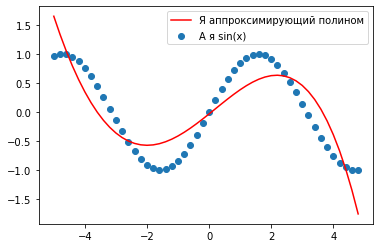

In [6]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.2)
y = np.sin(x)
f = np.poly1d(np.polyfit(x, y, 4))


plt.plot(x, f(x), color='red', label='Я аппроксимирующий полином')
plt.scatter(x, y, label='А я sin(x)')
plt.legend()